In [1]:
import pickle

with open('../outputs/synthesizers/scores_auc_worst_10.pkl', 'rb') as f:
    existing_data = pickle.load(f)

In [5]:
with open('../outputs/synthesizers/smote_base.pkl', 'rb') as f:
    smote = pickle.load(f)

In [6]:
import numpy as np

np.mean(smote) # 0.0001 is the increment achieved

0.9207811338585097

In [7]:
scores = [np.mean(e) for e in existing_data]
stds = [1.96 * np.std(e) / np.sqrt(10) for e in existing_data]
print(scores)
print(stds)

[-0.0006328448687403787, 0.00014754910060998938, 2.3211455926730463e-05, -0.00038986526974946754]
[6.730614950337711e-05, 3.724001854989234e-05, 6.0811370999252435e-05, 0.00021208105278807058]


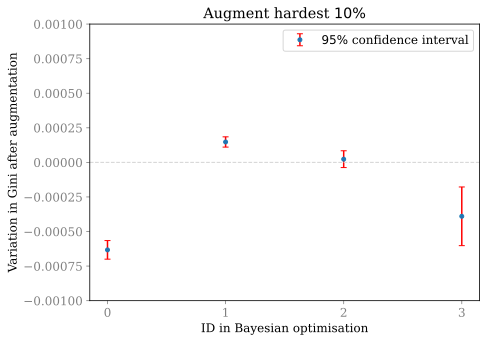

In [4]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rc('font', family='serif')
plt.rc('ytick', direction='out', color='gray')
plt.rc('xtick', direction='out', color='gray')
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.errorbar(range(len(existing_data)), scores, yerr=stds, fmt='.', markersize='8', ecolor='red', capsize=3, label='$95\%$ confidence interval')
ax.axhline(0, ls='--', lw=1, color='lightgray')
ax.set_ylim((-0.001, 0.001))
ax.set_xlabel('ID in Bayesian optimisation')
ax.set_ylabel('Variation in Gini after augmentation')
ax.set_title('Augment hardest $10\%$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend();

In [8]:
with open('../outputs/synthesizers/hyperparams_auc_worst_10.pkl', 'rb') as f:
    existing_params = pickle.load(f)

In [9]:
existing_params

[{'batch_size': 500, 'epochs': 100, 'embedding_dim': 128},
 {'batch_size': 500, 'epochs': 50, 'embedding_dim': 128},
 {'batch_size': 100, 'epochs': 21, 'embedding_dim': 64},
 {'batch_size': 100, 'epochs': 50, 'embedding_dim': 64}]